In [79]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras import layers
import tensorflow_addons as tfa
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle as pkl
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model, load_model
from keras import backend as K 
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Input,Bidirectional,Dropout,LayerNormalization,Conv1D, BatchNormalization, \
    multiply, concatenate, Flatten, Activation, dot, Layer
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
import time
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
from keras.layers.core import Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping,ModelCheckpoint
import pydot as pyd
from keras.utils.vis_utils import plot_model, model_to_dot

In [98]:
#load dfs
fdia1_c_1 = pd.read_csv('processed_14JunFDIA1_3labels.csv')
fdia1_c_2 = pd.read_csv('processed_12SepFDIA1_1_3labels.csv')
fdia1_c_3 = pd.read_csv('processed_12SepFDIA1_2_3labels.csv')
fdia1_c_4 = pd.read_csv('processed_12SepFDIA1_3_3labels.csv')
fdia1_c_5 =pd.read_csv('processed_12SepFDIA1_4_3labels.csv')

fdia1_m_1 = pd.read_csv('processed_meas_14JunFDIA1_3labels.csv')
fdia1_m_2 = pd.read_csv('processed_meas_12SepFDIA1_1_3labels.csv')
fdia1_m_3 = pd.read_csv('processed_meas_12SepFDIA1_2_3labels.csv')
fdia1_m_4 = pd.read_csv('processed_meas_12SepFDIA1_3_3labels.csv')
fdia1_m_5 =pd.read_csv('processed_meas_12SepFDIA1_4_3labels.csv')

fdia2_c_1 = pd.read_csv('processed_11JulyFDIA2_3labels.csv')
fdia2_c_2 = pd.read_csv('processed_29AugFDIA2_1_2labels.csv')
fdia2_c_3 = pd.read_csv('processed_29AugFDIA2_2_2labels.csv')
fdia2_c_4 = pd.read_csv('processed_29AugFDIA2_3_2labels.csv')
fdia2_c_5 =pd.read_csv('processed_29AugFDIA2_4_2labels.csv')
fdia2_c_6 =pd.read_csv('processed_29AugFDIA2_5_2labels.csv')

fdia2_m_1 = pd.read_csv('processed_meas_11JulyFDIA2_3labels.csv')
fdia2_m_2 = pd.read_csv('processed_meas_29AugFDIA2_1_2labels.csv')
fdia2_m_3 = pd.read_csv('processed_meas_29AugFDIA2_2_2labels.csv')
fdia2_m_4 = pd.read_csv('processed_meas_29AugFDIA2_3_2labels.csv')
fdia2_m_5 =pd.read_csv('processed_meas_29AugFDIA2_4_2labels.csv')
fdia2_m_6 =pd.read_csv('processed_meas_29AugFDIA2_5_2labels.csv')

fdia3_c_1 = pd.read_csv('processed_12SepFDIA3_0_3labels_fdiatda.csv')
fdia3_c_2 = pd.read_csv('processed_12SepFDIA3_1_3labels_fdiatda.csv')
fdia3_c_3 = pd.read_csv('processed_12SepFDIA3_2_3labels_fdiatda.csv')
fdia3_c_4 = pd.read_csv('processed_12SepFDIA3_3_3labels_fdiatda.csv')
fdia3_c_5 =pd.read_csv('processed_12SepFDIA3_4_3labels_fdiatda.csv')
fdia3_c_6 =pd.read_csv('processed_12SepFDIA3_5_3labels_fdiatda.csv')

fdia3_m_1 = pd.read_csv('processed_meas_12SepFDIA3_0_3labels_fdiatda.csv')
fdia3_m_2 = pd.read_csv('processed_meas_12SepFDIA3_1_3labels_fdiatda.csv')
fdia3_m_3 = pd.read_csv('processed_meas_12SepFDIA3_2_3labels_fdiatda.csv')
fdia3_m_4 = pd.read_csv('processed_meas_12SepFDIA3_3_3labels_fdiatda.csv')
fdia3_m_5 =pd.read_csv('processed_meas_12SepFDIA3_4_3labels_fdiatda.csv')
fdia3_m_6 =pd.read_csv('processed_meas_12SepFDIA3_5_3labels_fdiatda.csv')

fdia4_c_1 = pd.read_csv('processed_11JulyFDIA4_3labels_fdiatda.csv')
fdia4_c_2 = pd.read_csv('processed_12SepFDIA4_1_3labels_fdiatda.csv')
fdia4_c_3 = pd.read_csv('processed_12SepFDIA4_2_3labels_fdiatda.csv')
fdia4_c_4 = pd.read_csv('processed_12SepFDIA4_3_3labels_fdiatda.csv')
fdia4_c_5 =pd.read_csv('processed_12SepFDIA4_4_3labels_fdiatda.csv')
fdia4_c_6 =pd.read_csv('processed_12SepFDIA4_5_3labels_fdiatda.csv')

fdia4_m_1 = pd.read_csv('processed_meas_11JulyFDIA4_3labels_fdiatda.csv')
fdia4_m_2 = pd.read_csv('processed_meas_12SepFDIA4_1_3labels_fdiatda.csv')
fdia4_m_3 = pd.read_csv('processed_meas_12SepFDIA4_2_3labels_fdiatda.csv')
fdia4_m_4 = pd.read_csv('processed_meas_12SepFDIA4_3_3labels_fdiatda.csv')
fdia4_m_5 =pd.read_csv('processed_meas_12SepFDIA4_4_3labels_fdiatda.csv')
fdia4_m_6 =pd.read_csv('processed_meas_12SepFDIA4_5_3labels_fdiatda.csv')

tda1_c_1 = pd.read_csv('processed_11JulyTDA1_3labels_fdiatda.csv')
tda1_c_2 = pd.read_csv('processed_29AugTDA1_1_2labels_fdiatda.csv')
tda1_c_3 = pd.read_csv('processed_29AugTDA1_2_2labels_fdiatda.csv')
tda1_c_4 = pd.read_csv('processed_29AugTDA1_3_2labels_fdiatda.csv')
tda1_c_5 =pd.read_csv('processed_29AugTDA1_4_2labels_fdiatda.csv')
tda1_c_6 =pd.read_csv('processed_29AugTDA1_5_2labels_fdiatda.csv')

tda1_m_1 = pd.read_csv('processed_meas_11JulyTDA1_3labels_fdiatda.csv')
tda1_m_2 = pd.read_csv('processed_meas_29AugTDA1_1_2labels_fdiatda.csv')
tda1_m_3 = pd.read_csv('processed_meas_29AugTDA1_2_2labels_fdiatda.csv')
tda1_m_4 = pd.read_csv('processed_meas_29AugTDA1_3_2labels_fdiatda.csv')
tda1_m_5 =pd.read_csv('processed_meas_29AugTDA1_4_2labels_fdiatda.csv')
tda1_m_6 =pd.read_csv('processed_meas_29AugTDA1_5_2labels_fdiatda.csv')

tda2_c_1 = pd.read_csv('processed_11JulyTDA2_3labels.csv')
tda2_c_2 = pd.read_csv('processed_12SepTDA2_1_3labels.csv')
tda2_c_3 = pd.read_csv('processed_12SepTDA2_2_3labels.csv')
tda2_c_4 = pd.read_csv('processed_12SepTDA2_3_3labels.csv')
tda2_c_5 =pd.read_csv('processed_12SepTDA2_4_3labels.csv')

tda2_m_1 = pd.read_csv('processed_meas_11JulyTDA2_3labels.csv')
tda2_m_2 = pd.read_csv('processed_meas_12SepTDA2_1_3labels.csv')
tda2_m_3 = pd.read_csv('processed_meas_12SepTDA2_2_3labels.csv')
tda2_m_4 = pd.read_csv('processed_meas_12SepTDA2_3_3labels.csv')
tda2_m_5 =pd.read_csv('processed_meas_12SepTDA2_4_3labels.csv')

df_c_fdia1_all = pd.concat([fdia1_c_1, fdia1_c_2, fdia1_c_3, fdia1_c_4, fdia1_c_5])
df_m_fdia1_all = pd.concat([fdia1_m_1, fdia1_m_2, fdia1_m_3, fdia1_m_4, fdia1_m_5])

df_c_fdia2_all = pd.concat([fdia2_c_1, fdia2_c_2, fdia2_c_3, fdia2_c_4, fdia2_c_5, fdia2_c_6])
df_m_fdia2_all = pd.concat([fdia2_m_1, fdia2_m_2, fdia2_m_3, fdia2_m_4, fdia2_m_5, fdia2_c_6])

df_c_fdia3_all = pd.concat([fdia3_c_1, fdia3_c_2, fdia3_c_3, fdia3_c_4, fdia3_c_5, fdia3_c_6])
df_m_fdia3_all = pd.concat([fdia3_m_1, fdia3_m_2, fdia3_m_3, fdia3_m_4, fdia3_m_5, fdia3_m_6])

df_c_fdia4_all = pd.concat([fdia4_c_1, fdia4_c_2, fdia4_c_3, fdia4_c_4, fdia4_c_5, fdia4_c_6])
df_m_fdia4_all = pd.concat([fdia4_m_1, fdia4_m_2, fdia4_m_3, fdia4_m_4, fdia4_m_5, fdia4_m_6])

df_c_tda1_all = pd.concat([tda1_c_1, tda1_c_2, tda1_c_3, tda1_c_4, tda1_c_5, tda1_c_6])
df_m_tda1_all = pd.concat([tda1_m_1, tda1_m_2, tda1_m_3, tda1_m_4, tda1_m_5, tda1_m_6])

df_c_tda2_all = pd.concat([tda2_c_1, tda2_c_2, tda2_c_3, tda2_c_4, tda2_c_5])
df_m_tda2_all = pd.concat([tda2_m_1, tda2_m_2, tda2_m_3, tda2_m_4, tda2_m_5])

df_c_FDIA1 = df_c_fdia1_all
df_m_FDIA1 = df_m_fdia1_all
df_c_FDIA2 = df_c_fdia2_all
df_m_FDIA2 = df_m_fdia2_all
df_c_TDA1 = df_c_tda1_all
df_m_TDA1 = df_m_tda1_all
df_c_FDIA3 = df_c_fdia3_all
df_m_FDIA3 = df_m_fdia3_all
df_c_FDIA4 = df_c_fdia4_all
df_m_FDIA4 = df_m_fdia4_all
df_c_TDA2 = df_c_tda2_all
df_m_TDA2 = df_m_tda2_all


In [99]:
def moving_average(a, n):
    somearr = []
    for i in range(0, a.shape[0] - n):
        tot = np.sum(a[i:i+n])
        somearr.append(tot/n)
    for i in range(0,n):
        tot = np.sum(a[-n+i:])
        somearr.append(tot/(n-i))
    return np.array(somearr)

In [100]:
def prep_somedict(df_c_FDIA1, df_m_FDIA1, df_c_FDIA2, df_m_FDIA2, df_c_FDIA3, df_m_FDIA3, df_c_FDIA4, df_m_FDIA4, df_c_TDA1, df_m_TDA1, df_c_TDA2, df_b_TDA2):

    somedict = {}
    somedict['FDIA1'] = {}
    somedict['FDIA2'] = {}
    somedict['FDIA3'] = {}
    somedict['TDA1'] = {}
    somedict['FDIA4'] = {}
    somedict['TDA2'] = {}

    somedict['FDIA1']['df_c'] = df_c_FDIA1
    somedict['FDIA1']['df_m'] = df_m_FDIA1
    somedict['FDIA2']['df_c'] = df_c_FDIA2
    somedict['FDIA2']['df_m'] = df_m_FDIA2
    somedict['FDIA3']['df_c'] = df_c_FDIA3
    somedict['FDIA3']['df_m'] = df_m_FDIA3
    somedict['TDA1']['df_c'] = df_c_TDA1
    somedict['TDA1']['df_m'] = df_m_TDA1
    somedict['FDIA4']['df_c'] = df_c_FDIA4
    somedict['FDIA4']['df_m'] = df_m_FDIA4
    somedict['TDA2']['df_c'] = df_c_TDA2
    somedict['TDA2']['df_m'] = df_m_TDA2

    for somekey in somedict.keys():
    
        print(somekey)
    
        df_c = somedict[somekey]['df_c']
        df_m = somedict[somekey]['df_m']
    
        print("df_c.shape: {}".format(df_c.shape))
        print("df_m.shape: {}".format(df_m.shape))
    
        scada_q2c_sync_activated = df_c[df_c['mms.itemId'] == "SCADA_Q2C_Sync_Activated"]
        q2c_in_sync = df_c[df_c['mms.itemId'] == "Q2C_In_Sync"]
        VSD1_Start_Cmd = df_c[df_c['mms.itemId'] == "SCADA_VSD1_START_CMD"]
        VSD1_Stop_Cmd = df_c[df_c['mms.itemId'] == "SCADA_VSD1_STOP_CMD"]
        VSD1_Write_Cmd = df_c[df_c['ip.dst'] == "172.16.5.11"]
        Gen1_p_negative = df_c[df_c['mms.itemId'] == "GEN1_P_Negative"]
        Gen2_p_negative = df_c[df_c['mms.itemId'] == "GEN2_P_Negative"]
        Mied1_meas = df_m[df_m['ip.src'] == "172.16.3.11"]
        Mied2_meas = df_m[df_m['ip.src'] == "172.16.3.12"]
        
        print("Mied1_meas.shape: {}".format(Mied1_meas.shape))
        print("Mied2_meas.shape: {}".format(Mied2_meas.shape))

        indexes_to_drop = np.argwhere(Gen1_p_negative['mms.boolean'] == 0.5)[:,0]
        try:
            Gen1_p_negative_new = Gen1_p_negative.drop(Gen1_p_negative.index[indexes_to_drop + 1])
        except:
            Gen1_p_negative_new = Gen1_p_negative.drop(Gen1_p_negative.index[indexes_to_drop[:-1] + 1])
        scada_q2c_sync_activated_new = scada_q2c_sync_activated.drop(scada_q2c_sync_activated.index[np.argwhere(scada_q2c_sync_activated['mms.boolean'] == 1)[:,0] + 1])
        Gen2_p_negative_new = Gen2_p_negative.drop(Gen2_p_negative.index[np.argwhere(Gen2_p_negative['mms.boolean'] == 0.5)[:,0] + 1])

        Mied2_meas['gen1_p_negative'] = 0
        Mied2_meas['gen2_p_negative'] = 0
        Mied2_meas['scada_q2c_sync_activated'] = 0
        Mied2_meas['q2c_in_sync'] = 0

        gen1_negative_true_idxs = np.argwhere(Gen1_p_negative_new['mms.boolean'] == 0.5)[:,0]
        gen2_negative_true_idxs = np.argwhere(Gen2_p_negative_new['mms.boolean'] == 0.5)[:,0]
        
        for curr_idx in gen1_negative_true_idxs:
            start_frame_no = np.array(Gen1_p_negative_new.iloc[curr_idx]['frame.number'])
            if curr_idx != Gen1_p_negative_new.shape[0] - 1:
                end_frame_no = np.array(Gen1_p_negative_new.iloc[curr_idx+1]['frame.number'])
                Mied2_meas['gen1_p_negative'] = np.where(np.logical_and(Mied2_meas['frame.number'] >= start_frame_no, Mied2_meas['frame.number'] < end_frame_no), 1, Mied2_meas['gen1_p_negative'])
            else:
                Mied2_meas['gen1_p_negative'] = np.where(Mied2_meas['frame.number'] >= start_frame_no, 1, Mied2_meas['gen1_p_negative'])
            
        for curr_idx in gen2_negative_true_idxs:
            start_frame_no = np.array(Gen2_p_negative_new.iloc[curr_idx]['frame.number'])
            if curr_idx != Gen2_p_negative_new.shape[0] - 1:
                end_frame_no = np.array(Gen2_p_negative_new.iloc[curr_idx+1]['frame.number'])
                Mied2_meas['gen2_p_negative'] = np.where(np.logical_and(Mied2_meas['frame.number'] >= start_frame_no, Mied2_meas['frame.number'] < end_frame_no), 1, Mied2_meas['gen2_p_negative'])
            else:
                Mied2_meas['gen2_p_negative'] = np.where(Mied2_meas['frame.number'] >= start_frame_no, 1, Mied2_meas['gen2_p_negative'])

        scada_activated_true_idxs = np.argwhere(scada_q2c_sync_activated_new['mms.boolean'] == 1)[:,0]
        q2c_in_sync_true_idxs = np.argwhere(q2c_in_sync['mms.boolean'] == 1)[:,0]
        VSD1_Stop_Cmd_true_idxs = np.argwhere(VSD1_Stop_Cmd['mms.boolean'] == 1)[:,0]

        VSD1_Stop_Cmd_frame_nos = VSD1_Stop_Cmd.iloc[VSD1_Stop_Cmd_true_idxs]['frame.number']
        print(VSD1_Stop_Cmd_frame_nos)
        
        if VSD1_Stop_Cmd.shape[0] != 0:
            for idx in scada_activated_true_idxs:
                scada_activated_frame_no = scada_q2c_sync_activated_new.iloc[idx]['frame.number']
                all_possible_stop_frame_no = np.array(VSD1_Stop_Cmd_frame_nos.iloc[np.argwhere(VSD1_Stop_Cmd_frame_nos > scada_activated_frame_no)[:,0]])
                if all_possible_stop_frame_no.shape[0] != 0:
                    right_stop_frame_no = all_possible_stop_frame_no[0]
                    Mied2_meas['scada_q2c_sync_activated'] = np.where(np.logical_and(Mied2_meas['frame.number'] >= scada_activated_frame_no, Mied2_meas['frame.number'] <= right_stop_frame_no), 1, Mied2_meas['scada_q2c_sync_activated'])
                else:
                    right_stop_frame_no = -1
                    Mied2_meas['scada_q2c_sync_activated'] = np.where(Mied2_meas['frame.number'] >= scada_activated_frame_no, 1, Mied2_meas['scada_q2c_sync_activated'])
                print(scada_activated_frame_no, right_stop_frame_no)

            for idx in q2c_in_sync_true_idxs:
                q2c_in_sync_frame_no = q2c_in_sync.iloc[idx]['frame.number']
                all_possible_stop_frame_no = np.array(VSD1_Stop_Cmd_frame_nos.iloc[np.argwhere(VSD1_Stop_Cmd_frame_nos > q2c_in_sync_frame_no)[:,0]])
                if all_possible_stop_frame_no.shape[0] != 0:
                    right_stop_frame_no = all_possible_stop_frame_no[0]
                    Mied2_meas['q2c_in_sync'] = np.where(np.logical_and(Mied2_meas['frame.number'] >= q2c_in_sync_frame_no, Mied2_meas['frame.number'] <= right_stop_frame_no), 1, Mied2_meas['q2c_in_sync'])
                else:
                    right_stop_frame_no = -1
                    Mied2_meas['scada_q2c_sync_activated'] = np.where(Mied2_meas['frame.number'] >= q2c_in_sync_frame_no, 1, Mied2_meas['q2c_in_sync'])
                print(q2c_in_sync_frame_no, right_stop_frame_no)
        else:
            for idx in scada_activated_true_idxs:
                scada_activated_frame_no = scada_q2c_sync_activated_new.iloc[idx]['frame.number']
                Mied2_meas['scada_q2c_sync_activated'] = np.where(Mied2_meas['frame.number'] >= scada_activated_frame_no, 1, Mied2_meas['scada_q2c_sync_activated'])
            
            for idx in q2c_in_sync_true_idxs:
                q2c_in_sync_frame_no = q2c_in_sync.iloc[idx]['frame.number']
                Mied2_meas['q2c_in_sync'] = np.where(Mied2_meas['frame.number'] >= q2c_in_sync_frame_no, 1, Mied2_meas['q2c_in_sync'])


        Mied2_meas['power_ratio'] = 0

        prev_load = 0
        Mied2_meas = Mied2_meas.reset_index()
        for index, meow in Mied2_meas.iterrows():
            try:
                mied1_totw = Mied1_meas['TotW'].iloc[np.argwhere(Mied1_meas['frame.time_epoch'] == meow['frame.time_epoch'])[:,0]]
                if float(meow['TotW']) == 0.0 and float(mied1_totw) == 0.0:
                    ratio = 0.0
                    prev_load = ratio
                    ratio = float(ratio)
                else:
                    ratio = float(meow['TotW'])/float(mied1_totw)
                    ratio = float(ratio)
                    prev_load = ratio
            except Exception as e:
                print(index, "no hay disco")
                ratio = prev_load
                ratio = float(ratio)
            Mied2_meas['power_ratio'].iloc[index] = ratio

        Mied2_meas['modbus_speed'] = 0.0
        prev_frame_no = 0
        VSD1_speed = VSD1_Write_Cmd[['frame.number', 'modbus.regval_uint16']]
        for index, meow in Mied2_meas.iterrows():
            frame_no = meow['frame.number']
            current_vsd1_vals = VSD1_speed['modbus.regval_uint16'].iloc[np.argwhere(np.logical_and(VSD1_speed['frame.number'] > prev_frame_no, VSD1_speed['frame.number'] < frame_no))[:,0]]
            print
            if current_vsd1_vals.shape[0] == 0:
                vsd1_val = 0.0
            elif current_vsd1_vals.shape[0] > 30:
                vsd1_val = np.max(np.array(current_vsd1_vals[-25:]))
                if vsd1_val < 7500:
                    vsd1_val = 0.0
                else:
                    vsd1_val -= 7499
            else:
                vsd1_val = np.max(np.array(current_vsd1_vals))
                if vsd1_val < 7500:
                    vsd1_val = 0.0
                else:
                    vsd1_val -= 7499
            Mied2_meas['modbus_speed'].iloc[index] = vsd1_val
            prev_frame_no = frame_no
            
        print("MODBUS SPEED", np.unique(Mied2_meas['modbus_speed']))
        
        Mied2_meas['loading_percentage'] = 50.0
        if somekey == 'FDIA5':
            Mied2_meas['loading_percentage'] = np.where(Mied2_meas['frame.number'] >= 307059, 70.0, Mied2_meas['loading_percentage'])
            Mied2_meas['loading_percentage'] = np.where(Mied2_meas['frame.number'] >= 428690, 60.0, Mied2_meas['loading_percentage'])
            Mied2_meas['loading_percentage'] = np.where(Mied2_meas['frame.number'] >= 601702, 80.0, Mied2_meas['loading_percentage'])
        
        Mied2_meas['modbus_speed'] = np.where(Mied2_meas['modbus_speed'] > 0, Mied2_meas['modbus_speed'] - 7490, Mied2_meas['modbus_speed'])
        Mied2_meas['Hz'] = np.where(Mied2_meas['Hz'] > 0, Mied2_meas['Hz'] - 50, Mied2_meas['Hz'])
        
        Mied2_meas.fillna(method='ffill')

        '''
        totw_diff = np.diff(Mied2_meas['TotW'])
        totw_diff = np.concatenate((np.zeros(1), totw_diff), axis=0)
        Mied2_meas['TotW'] = totw_diff
        
        totvar_diff = np.diff(Mied2_meas['TotVar'])
        totvar_diff = np.concatenate((np.zeros(1), totvar_diff), axis=0)
        Mied2_meas['TotVar'] = totvar_diff
        
        #totpf_diff = np.diff(Mied2_meas['TotPF'])
        #totpf_diff = np.concatenate((np.zeros(1), totpf_diff), axis=0)
        #Mied2_meas['TotPF'] = totpf_diff
        
        tota_diff = np.diff(Mied2_meas['A.phsA'])
        tota_diff = np.concatenate((np.zeros(1), tota_diff), axis=0)
        Mied2_meas['A.phsA'] = tota_diff
        
        #tota_diff = np.diff(Mied2_meas['Phv.neut.ang'])
        #tota_diff = np.concatenate((np.zeros(1), tota_diff), axis=0)
        #Mied2_meas['Phv.neut.ang'] = tota_diff
        
        #Mied2_meas['TotW'] = moving_average(Mied2_meas['TotW'], 10)
        #Mied2_meas['TotVar'] = moving_average(Mied2_meas['TotVar'], 10)
        #Mied2_meas['TotPF'] = moving_average(Mied2_meas['TotVar'], 10)
        #Mied2_meas['power_ratio'] = moving_average(Mied2_meas['power_ratio'], 10)
        #Mied2_meas['A.phsA'] = moving_average(Mied2_meas['A.phsA'], 10)
        
        Mied2_meas['Phv.neut.ang'] = np.abs(Mied2_meas['Phv.neut.ang'])
        '''
        
        somedict[somekey]['mied2_meas'] = Mied2_meas
    
    return somedict



In [101]:
somedict = prep_somedict(df_c_FDIA1, df_m_FDIA1, df_c_FDIA2, df_m_FDIA2, df_c_FDIA3, df_m_FDIA3, df_c_FDIA4, df_m_FDIA4, df_c_TDA1, df_m_TDA1, df_c_TDA2, df_m_TDA2)

FDIA1
df_c.shape: (148698, 14)
df_m.shape: (10198, 32)
Mied1_meas.shape: (5108, 32)
Mied2_meas.shape: (5090, 32)
11416     724267
44527    3409868
60256    4771404
60671    4788595
5989      419191
12486     831749
3820      255257
3813      246189
2675      171935
Name: frame.number, dtype: int64
2412773 3409868
2778069 3409868
7156374 -1
13763 724267
41819 724267
1068143 3409868
20813 724267
651903 724267
16837 724267
559874 724267
2893048 3409868
2894686 3409868
2896331 3409868
7199993 -1
7201556 -1
7203142 -1
232268 724267
233938 724267
135640 724267
138211 724267
1113450 3409868
126940 724267
128518 724267
718388 724267
719977 724267
721538 724267
97860 724267
22 no hay disco
76 no hay disco
126 no hay disco
171 no hay disco
219 no hay disco
264 no hay disco
309 no hay disco
334 no hay disco
386 no hay disco
436 no hay disco
485 no hay disco
533 no hay disco
583 no hay disco
635 no hay disco
683 no hay disco
733 no hay disco
782 no hay disco
831 no hay disco
883 no hay disco
958 n

1817 no hay disco
1868 no hay disco
1916 no hay disco
1936 no hay disco
1986 no hay disco
2033 no hay disco
2089 no hay disco
2120 no hay disco
2121 no hay disco
2122 no hay disco
2123 no hay disco
2124 no hay disco
2125 no hay disco
2126 no hay disco
2127 no hay disco
2128 no hay disco
2129 no hay disco
2130 no hay disco
2131 no hay disco
2132 no hay disco
2133 no hay disco
2134 no hay disco
2135 no hay disco
2136 no hay disco
2137 no hay disco
2138 no hay disco
2139 no hay disco
2140 no hay disco
2141 no hay disco
2142 no hay disco
2143 no hay disco
2144 no hay disco
2145 no hay disco
2146 no hay disco
2147 no hay disco
2148 no hay disco
2149 no hay disco
2150 no hay disco
2151 no hay disco
2152 no hay disco
2153 no hay disco
2154 no hay disco
2155 no hay disco
2156 no hay disco
2157 no hay disco
2158 no hay disco
2159 no hay disco
2160 no hay disco
2161 no hay disco
2162 no hay disco
2163 no hay disco
2164 no hay disco
2165 no hay disco
2166 no hay disco
2167 no hay disco
2168 no ha

In [102]:
''''
ENC_PROJECTION_DIM = 10
ENC_NUM_HEADS = 1
ENC_LAYERS = 1
NUM_PATCHES = 1
DEC_LAYERS = 1
DEC_NUM_HEADS = 1
LAYER_NORM_EPS = 1e-6
DEC_PROJECTION_DIM = 10
ENC_TRANSFORMER_UNITS = 10
MLPHL = [10]
'''
ENC_PROJECTION_DIM = 140
ENC_NUM_HEADS = 3
ENC_LAYERS = 3
NUM_PATCHES = 2
DEC_LAYERS = 2
DEC_NUM_HEADS = 3
LAYER_NORM_EPS = 1e-6
DEC_PROJECTION_DIM = 140
ENC_TRANSFORMER_UNITS = 140
MLPHL = [140]
window_size = 10
someval = 9 * window_size


In [103]:
step = tf.Variable(0, trainable=False)
boundaries = [100000, 150000]
values = [1e-3, 3e-3, 2e-3]
learning_rate_fn = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)

In [104]:
def mlp(x, dropout_rate, hidden_units):
    '''
    The MLP layer, included Dense layer and dropout layer
    '''
    for units in hidden_units:
        x = layers.Dense(units, activation = tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [105]:
def create_encoder(num_heads = ENC_NUM_HEADS, num_layers = ENC_LAYERS):
    '''
    The encoder of the autoencoder
    this part will extract the high-dimensional representations out
    '''
    inputs = layers.Input((None, ENC_PROJECTION_DIM))
    x = inputs

    for _ in range(num_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon = LAYER_NORM_EPS)(x)

        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads = num_heads, key_dim = ENC_PROJECTION_DIM, dropout = 0.1
        )(x1, x1)
        
        print(attention_output)

        # # Skip connection 1.
        x2 = layers.Add()([attention_output, x])

        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon = LAYER_NORM_EPS)(x2)

        # MLP.
        x3 = mlp(x3, hidden_units = MLPHL, dropout_rate = 0.1)

        # Skip connection 2.
        x = layers.Add()([x3, x2])

    outputs = layers.LayerNormalization(epsilon = LAYER_NORM_EPS)(x)
    return keras.Model(inputs, outputs, name = "ae_encoder")

In [106]:
def create_decoder(
    num_layers = DEC_LAYERS, num_heads = DEC_NUM_HEADS
):
    '''
    The decoder of the autoencoder
    it will reconstruct the original data by using the extracted representations
    '''
    inputs = layers.Input((NUM_PATCHES, ENC_PROJECTION_DIM))
    x = layers.Dense(DEC_PROJECTION_DIM)(inputs)

    for _ in range(num_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS)(x)

        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads = num_heads, key_dim = DEC_PROJECTION_DIM, dropout=0.1
        )(x1, x1)

        # Skip connection 1.
        x2 = layers.Add()([attention_output, x])

        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon = LAYER_NORM_EPS)(x2)

        # MLP.
        x3 = mlp(x3, hidden_units = MLPHL, dropout_rate = 0.1)

        # Skip connection 2.
        x = layers.Add()([x3, x2])

    x = layers.LayerNormalization(epsilon = 1e-6)(x)
    outputs = layers.Dense(9 * int(window_size/2))(x)

    return keras.Model(inputs, outputs, name = "ae_decoder")

In [107]:
def split_test(dftest):
    #select some labeled data for downstream classifier training
    dftest = pd.DataFrame(dftest)
    Xtest = dftest.iloc[:, :someval].values.reshape(dftest.shape[0], window_size, 9)
    Ytest = dftest.iloc[:, -1]
    return Xtest, Ytest

In [108]:
'''
def split_train(dftrain):
    extract the dataset for classifier training(Only for classifier)
    normalnum(int): number of normal data for clasifier training
    FDIAnum(int): number of FDIA data for clasifier training
    TDAnum(int): number of TDA data for clasifier training
    dftrain(DataFrame): training dataset
    dftest(DataFrame): testing dataset
    return: the splited data(np.array)
    
    dftrain=np.array(dftrain)
    df_noattack = pd.DataFrame(dftrain[dftrain[:, -1] == 0])
    df_attack1 = pd.DataFrame(dftrain[dftrain[:, -1] == 1])
    df_attack2 = pd.DataFrame(dftrain[dftrain[:, -1] == 2])
    df_attack3 = pd.DataFrame(dftrain[dftrain[:, -1] == 3])
    df_attack4 = pd.DataFrame(dftrain[dftrain[:, -1] == 4])
    df_attack5 = pd.DataFrame(dftrain[dftrain[:, -1] == 5])
    df_attack6 = pd.DataFrame(dftrain[dftrain[:, -1] == 6])
    df_attack7 = pd.DataFrame(dftrain[dftrain[:, -1] == 7])
    
    #select some labeled data for downstream classifier training
    train_normal = df_noattack
    train_abnormal1 = df_attack1
    train_abnormal2 = df_attack2
    train_abnormal3 = df_attack3
    train_abnormal4 = df_attack4
    train_abnormal5 = df_attack5
    train_abnormal6 = df_attack6
    train_abnormal7 = df_attack7
    train1 = pd.concat([train_normal, train_abnormal1, train_abnormal2, train_abnormal3, train_abnormal4, train_abnormal5, train_abnormal6, train_abnormal7])
    

    #train1 = pd.concat([train_normal, train_abnormal])
    Xtrain = train1.iloc[:, :100].values.reshape(train1.shape[0], 10, 10)
    Ytrain = train1.iloc[:, -1]
    return Xtrain, Ytrain
'''
    
def split_train(dftrain):
    #extract the dataset for classifier training(Only for classifier)
    ##normalnum(int): number of normal data for clasifier training
    #FDIAnum(int): number of FDIA data for clasifier training
    #TDAnum(int): number of TDA data for clasifier training
    #dftrain(DataFrame): training dataset
    #dftest(DataFrame): testing dataset
    #return: the splited data(np.array)
    
    dftrain=np.array(dftrain)
    df_noattack = pd.DataFrame(dftrain[dftrain[:, -1] == 0])
    df_attack_1 = pd.DataFrame(dftrain[dftrain[:, -1] == 1])
    df_attack_2 = pd.DataFrame(dftrain[dftrain[:, -1] == 2])
    

    #select some labeled data for downstream classifier training
    train_normal = df_noattack
    train_abnormal_1 = df_attack_1
    train_abnormal_2 = df_attack_2
    train1 = pd.concat([train_normal, train_abnormal_1, train_abnormal_2])
    Xtrain = train1.iloc[:, :someval].values.reshape(train1.shape[0], window_size, 9)
    Ytrain = train1.iloc[:, -1]
    return Xtrain, Ytrain

In [109]:
def GMMsplit(dftrain):
    '''
    extract the dataset for GMM training(Only for GMM)
    GMMnornum(int): number of normal data for GMM training
    GMMFDIAnum(int): number of FDIA data for GMM training
    GMMTDAnum(int): number of TDA data for GMM training
    dftrain(DataFrame): training dataset
    return: the splited data(np.array)
    '''
    
    dftrain=np.array(dftrain)
    df_noattack = pd.DataFrame(dftrain[dftrain[:, -1] == 0])
    df_attack_1 = pd.DataFrame(dftrain[dftrain[:, -1] == 1])
    df_attack_2 = pd.DataFrame(dftrain[dftrain[:, -1] == 2])

    # select some unlabeled data for GMM training, will improve the accuracy by about 1%
    train_normal = df_noattack
    train_abnormal_1 = df_attack_1
    train_abnormal_2 = df_attack_2
    train2 = pd.concat([train_normal, train_abnormal_1, train_abnormal_2])
    XtrainGMM = train2.iloc[:, :someval].values.reshape(train2.shape[0], window_size, 9)
    return XtrainGMM

In [110]:
def prep_train_data(df):
    train_full = df
    #Phv.neut.ang,'scada_q2c_sync_activated','q2c_in_sync','gen1_p_negative','gen2_p_negative'
    #'TotW','TotVar','power_ratio','A.phsA'
    #'TotPF', 'modbus_speed'
    #'TotW', 'TotVar', 'A.phsA' #modbus_speed
    #'scada_q2c_sync_activated','q2c_in_sync','gen1_p_negative','gen2_p_negative'
    train_both = train_full[['TotW', 'TotVar', 'A.phsA', 'Phv.neut.ang','modbus_speed','scada_q2c_sync_activated','q2c_in_sync','gen1_p_negative','gen2_p_negative','status']]
    train_normal = train_both[train_both['status'] == 0]
    train_attack = train_both[train_both['status'] == 1]
    train_attack_1 = train_both[train_both['status'] == 2]
    cols = ['TotW', 'TotVar', 'A.phsA', 'Phv.neut.ang','modbus_speed','scada_q2c_sync_activated','q2c_in_sync','gen1_p_negative','gen2_p_negative']
    arr_normal = np.array(train_normal[cols])
    arr_attack = np.array(train_attack[cols])
    arr_attack_1 = np.array(train_attack_1[cols])
    arr_normal_2 = []
    for i in range(arr_normal.shape[0] - window_size):   
        arr_normal_2.append(arr_normal[i:i+window_size].flatten())
    arr_normal_2 = np.array(arr_normal_2)
    arr_attack_2 = []
    for i in range(arr_attack.shape[0] - window_size):   
        arr_attack_2.append(arr_attack[i:i+window_size].flatten())
    arr_attack_3 = [] 
    for i in range(arr_attack_1.shape[0] - window_size):   
        arr_attack_3.append(arr_attack_1[i:i+window_size].flatten())
    arr_attack_2 = np.array(arr_attack_2)
    arr_attack_3 = np.array(arr_attack_3)
    arr_normal_2 = np.concatenate([arr_normal_2,np.zeros((arr_normal_2.shape[0],1))], axis=1)
    print(arr_normal_2.shape)
    arr_attack_2 = np.concatenate([arr_attack_2,np.ones((arr_attack_2.shape[0],1))], axis=1)
    print(arr_attack_2.shape)
    arr_attack_3 = np.concatenate([arr_attack_3,np.full((arr_attack_3.shape[0],1),2)], axis=1)
    print(arr_attack_2.shape)
    arr_train = np.concatenate([arr_normal_2, arr_attack_2, arr_attack_3], axis=0)
    print(arr_train.shape)
    Scaler = MinMaxScaler()
    a = Scaler.fit(arr_train[:,:someval].reshape(arr_train.shape[0]*someval, 1))
    df1 = a.transform(arr_train[:, :someval].reshape(arr_train.shape[0]*someval, 1))
    #print(df1.shape, arr_train[:,-1].shape)
    dftrain = np.concatenate([df1.reshape(arr_train.shape[0],someval), arr_train[:,-1].reshape(-1,1)], axis=1)
    Xtrain = df1.reshape(arr_train.shape[0], window_size, 9)
    return Xtrain, dftrain, a, arr_train[:,:someval].reshape(arr_train.shape[0],window_size,9)

In [111]:
'''
def prep_test_data(somedict, tag, scaler, attack_type):
    windowsize = 10
    test = somedict[tag]['mied2_meas']
    print(test.shape)
    test_both = test[['TotW','TotVar','A.phsA','Phv.neut.ang','scada_q2c_sync_activated','q2c_in_sync','gen1_p_negative','gen2_p_negative','status']]
    test_normal = test_both[test_both['status'] == 0]
    if attack_type == 1:
        test_attack = test_both[test_both['status'] == 1]
    elif attack_type == 2:
        test_attack = test_both[test_both['status'] == 2]
    elif attack_type == 3:
        test_attack = test_both[test_both['status'] == 3]
    elif attack_type == 4:
        test_attack = test_both[test_both['status'] == 4]
    elif attack_type == 5:
        test_attack = test_both[test_both['status'] == 5]
    elif attack_type == 6:
        test_attack = test_both[test_both['status'] == 6]
    else:
        test_attack = test_both[test_both['status'] == 7] 
    print("test_attack shape: {}".format(test_attack.shape))
    cols = ['TotW','TotVar','A.phsA','Phv.neut.ang','scada_q2c_sync_activated','q2c_in_sync','gen1_p_negative','gen2_p_negative']
    arr_normal = np.array(test_normal[cols])
    arr_attack = np.array(test_attack[cols])
    
    arr_normal_2 = []
    for i in range(arr_normal.shape[0] - windowsize):   
        arr_normal_2.append(arr_normal[i:i+windowsize].flatten())
    arr_normal_2 = np.array(arr_normal_2)
    
    arr_attack_2 = []
    for i in range(arr_attack.shape[0] - windowsize):   
        arr_attack_2.append(arr_attack[i:i+windowsize].flatten())
    arr_attack_2 = np.array(arr_attack_2)
    print(arr_attack_2.shape)
    
    arr_normal_2 = np.concatenate([arr_normal_2,np.zeros((arr_normal_2.shape[0],1))], axis=1)
    #print(arr_normal_2.shape)
    
    if attack_type == 1:
        arr_attack_2 = np.concatenate([arr_attack_2,np.ones((arr_attack_2.shape[0],1))], axis=1)
    elif attack_type == 2:
        arr_attack_2 = np.concatenate([arr_attack_2,np.full((arr_attack_2.shape[0],1),2)], axis=1)
    elif attack_type == 3:
        arr_attack_2 = np.concatenate([arr_attack_2,np.full((arr_attack_2.shape[0],1),3)], axis=1)
    elif attack_type == 4:
        arr_attack_2 = np.concatenate([arr_attack_2,np.full((arr_attack_2.shape[0],1),4)], axis=1)
    elif attack_type == 5:
        arr_attack_2 = np.concatenate([arr_attack_2,np.full((arr_attack_2.shape[0],1),5)], axis=1)
    elif attack_type == 6:
        arr_attack_2 = np.concatenate([arr_attack_2,np.full((arr_attack_2.shape[0],1),6)], axis=1)
    elif attack_type == 7:
        arr_attack_2 = np.concatenate([arr_attack_2,np.full((arr_attack_2.shape[0],1),7)], axis=1)
    
    #arr_attack_2 = np.concatenate([arr_attack_2,np.ones((arr_attack_2.shape[0],1))], axis=1)
    print(arr_attack_2.shape)
    
    arr_test = np.concatenate([arr_normal_2, arr_attack_2], axis=0)
    print(arr_test.shape)
    df_test = scaler.transform(arr_test[:, :100].reshape(arr_test.shape[0]*100, 1))
    df_test = np.concatenate([df_test.reshape(arr_test.shape[0],100), arr_test[:,-1].reshape(-1,1)], axis=1)
    somedict[tag]['test_data'] = df_test
'''
def prep_test_data(somedict, tag, scaler, attack_type):
    test = somedict[tag]['mied2_meas']
    test_both = test[['TotW', 'TotVar', 'A.phsA', 'Phv.neut.ang','modbus_speed','scada_q2c_sync_activated','q2c_in_sync','gen1_p_negative','gen2_p_negative','status']]
    test_normal = test_both[test_both['status'] == 0]
    if attack_type == 1:
        test_attack = test_both[test_both['status'] == 1]
    else:
        test_attack = test_both[test_both['status'] == 2]
    cols = ['TotW', 'TotVar', 'A.phsA', 'Phv.neut.ang','modbus_speed','scada_q2c_sync_activated','q2c_in_sync','gen1_p_negative','gen2_p_negative']
    arr_normal = np.array(test_normal[cols])
    arr_attack = np.array(test_attack[cols])
    print("ARR ATTACK NO SLIDING SIZE: ", arr_attack.shape)
    arr_normal_2 = []
    for i in range(arr_normal.shape[0] - window_size):   
        arr_normal_2.append(arr_normal[i:i+window_size].flatten())
    arr_normal_2 = np.array(arr_normal_2)
    print("ARR NORMAL SIZE: ", arr_normal_2.shape)
    arr_attack_2 = []
    for i in range(arr_attack.shape[0] - window_size):   
        arr_attack_2.append(arr_attack[i:i+window_size].flatten())
    arr_attack_2 = np.array(arr_attack_2)
    print("ARR ATTACK SIZE: ", arr_attack_2.shape)
    arr_normal_2 = np.concatenate([arr_normal_2,np.zeros((arr_normal_2.shape[0],1))], axis=1)
    print(arr_normal_2.shape)
    if attack_type == 1:
        arr_attack_2 = np.concatenate([arr_attack_2,np.ones((arr_attack_2.shape[0],1))], axis=1)
    else:
        arr_attack_2 = np.concatenate([arr_attack_2,np.full((arr_attack_2.shape[0],1),2)], axis=1)
    print(arr_attack_2.shape)
    arr_test = np.concatenate([arr_normal_2, arr_attack_2], axis=0)
    print(arr_test.shape)
    df_test = scaler.transform(arr_test[:, :someval].reshape(arr_test.shape[0]*someval, 1))
    df_test = np.concatenate([df_test.reshape(arr_test.shape[0],someval), arr_test[:,-1].reshape(-1,1)], axis=1)
    somedict[tag]['test_data'] = arr_test

In [112]:
def acc(Y_test, Ypred):
    '''
    code for Precision and Recall for different attacks' calculation
    Y_test(np_array): The ground true label for the testset.
    Ypred(np_array): The predicted label by the downstream classifier.
    Return: the f1-score for different attacks(float).
    '''
    TN0 = 0
    TP0 = 0
    FP0 = 0
    FN0 = 0
    TN1 = 0
    TP1 = 0
    FP1 = 0
    FN1 = 0
    TN2 = 0
    TP2 = 0
    FP2 = 0
    FN2 = 0
    for i in range(Ypred.shape[0]):
        if Y_test[i] == 1:
            if Ypred[i] == 1:
                TP1 += 1
            else:FN1 += 1
        elif Y_test[i] != 1:
            if Ypred[i] != 1:
                TN1 += 1
            else:FP1 += 1
    for i in range(Ypred.shape[0]):
        if Y_test[i] == 0:
            if Ypred[i] == 0:
                TP0 += 1
            else:FN0 += 1
        elif Y_test[i] != 0:
            if Ypred[i] != 0:
                TN0 += 1
            else:FP0 += 1
    for i in range(Ypred.shape[0]):
        if Y_test[i] == 2:
            if Ypred[i] == 2:
                TP2 += 1
            else:FN2 += 1
        elif Y_test[i] != 2:
            if Ypred[i] != 2:
                TN2 += 1
            else:FP2 += 1
    print(TP0,TN0,FP0,FN0,TP1,TN1,FP1,FN1,TP2,TN2,FP2,FN2)
    a = 'for normal accuracy/precision/recall/f1/accuracy:'
    b = 'for FDIA accuracy/precision/recall/f1/accuracy:'
    c = 'for TDA accuracy/precision/recall/f1/accuracy:'
    try:
        print(a, (TP0+TN0)/(TP0+FP0+TN0+FN0), TP0/(FP0+TP0), TP0/(FN0+TP0), (TP0/(FP0+TP0)+TP0/(FN0+TP0))/2)
    except:
        pass
    try:
        print(b, (TP1+TN1)/(TP1+FP1+TN1+FN1), TP1/(FP1+TP1), TP1/(FN1+TP1), (TP1/(FP1+TP1)+TP1/(FN1+TP1))/2)
    except:
        pass
    try:
        print(c, (TP2+TN2)/(TP2+FP2+TN2+FN2), TP2/(FP2+TP2), TP2/(FN2+TP2), (TP2/(FP2+TP2)+TP2/(FN2+TP2))/2)
    except:
        pass

In [113]:
def binned_acc(Y_test, Y_pred, bin_size, thres):
    no_runs = int(Y_test.shape[0]/bin_size)
    TP0 = 0
    TN0 = 0
    FP0 = 0
    FN0 = 0
    TP1 = 0
    TN1 = 0
    FP1 = 0
    FN1 = 0
    TP2 = 0
    TN2 = 0
    FP2 = 0
    FN2 = 0
    for i in range(no_runs+1):
        somearr1 = []
        somearr2 = []
        if i == no_runs:
            somearr1.append(np.argwhere(Y_test[i*bin_size:] == 0).shape[0])
            somearr1.append(np.argwhere(Y_test[i*bin_size:] == 1).shape[0])
            somearr1.append(np.argwhere(Y_test[i*bin_size:] == 2).shape[0])
            if somearr1[1] >= thres:
                true_result = 1
            elif somearr1[2] >= thres:
                true_result = 2
            else:
                true_result = 0
            somearr2.append(np.argwhere(Y_pred[i*bin_size:] == 0).shape[0])
            somearr2.append(np.argwhere(Y_pred[i*bin_size:] == 1).shape[0])
            somearr2.append(np.argwhere(Y_pred[i*bin_size:] == 2).shape[0])
            if somearr2[1] >= thres:
                pred_result = 1
            elif somearr2[2] >= thres:
                pred_result = 2
            else:
                pred_result = 0
        else:
            somearr1.append(np.argwhere(Y_test[i*bin_size:(i+1)*bin_size] == 0).shape[0])
            somearr1.append(np.argwhere(Y_test[i*bin_size:(i+1)*bin_size] == 1).shape[0])
            somearr1.append(np.argwhere(Y_test[i*bin_size:(i+1)*bin_size] == 2).shape[0])
            if somearr1[1] >= thres:
                true_result = 1
            elif somearr1[2] >= thres:
                true_result = 2
            else:
                true_result = 0
            somearr2.append(np.argwhere(Y_pred[i*bin_size:(i+1)*bin_size] == 0).shape[0])
            somearr2.append(np.argwhere(Y_pred[i*bin_size:(i+1)*bin_size] == 1).shape[0])
            somearr2.append(np.argwhere(Y_pred[i*bin_size:(i+1)*bin_size] == 2).shape[0])
            if somearr2[1] >= thres:
                pred_result = 1
            elif somearr2[2] >= thres:
                pred_result = 2
            else:
                pred_result = 0
        #print(i, somearr1, somearr2, true_result, pred_result)
        if true_result == 1:
            if pred_result == 1:
                TP1 += 1
            else:FN1 += 1
        elif true_result != 1:
            if pred_result != 1:
                TN1 += 1
            else:FP1 += 1
        if true_result == 0:
            if pred_result == 0:
                TP0 += 1
            else:FN0 += 1
        elif true_result != 0:
            if pred_result != 0:
                TN0 += 1
            else:FP0 += 1
        if true_result == 2:
            if pred_result == 2:
                TP2 += 1
            else:FN2 += 1
        elif true_result != 2:
            if pred_result != 2:
                TN2 += 1
            else:FP2 += 1
    print(TP0,TN0,FP0,FN0,TP1,TN1,FP1,FN1,TP2,TN2,FP2,FN2)
    a = 'for binned normal precision/recall/f1:'
    b = 'for binned FDIA precision/recall/f1:'
    c = 'for binned TDA precision/recall/f1:'
    try:
        print(a, TP0/(FP0+TP0), TP0/(FN0+TP0), (TP0/(FP0+TP0)+TP0/(FN0+TP0))/2)
    except:
        pass
    try:
        print(b, TP1/(FP1+TP1), TP1/(FN1+TP1), (TP1/(FP1+TP1)+TP1/(FN1+TP1))/2)
    except:
        pass
    try:
        print(c, TP2/(FP2+TP2), TP2/(FN2+TP2), (TP2/(FP2+TP2)+TP2/(FN2+TP2))/2)
    except:
        pass

In [114]:
FDIA1_df = somedict['FDIA1']['mied2_meas']
FDIA2_df = somedict['FDIA2']['mied2_meas']
TDA1_df = somedict['TDA1']['mied2_meas']
FDIA3_df = somedict['FDIA3']['mied2_meas']
FDIA4_df = somedict['FDIA4']['mied2_meas']
TDA2_df = somedict['TDA2']['mied2_meas']

all_df = pd.concat(objs = [FDIA1_df, FDIA2_df, TDA1_df, FDIA3_df, FDIA4_df, TDA2_df], axis=0, ignore_index=True)

In [115]:
some_df = all_df[['TotW','TotVar','A.phsA','Phv.neut.ang','modbus_speed','scada_q2c_sync_activated','q2c_in_sync','gen1_p_negative','gen2_p_negative','status']]
some_df.to_csv('dataset_A_raw.csv')

In [116]:
FDIA1_df = somedict['FDIA1']['mied2_meas']
FDIA2_df = somedict['FDIA2']['mied2_meas']
TDA1_df = somedict['TDA1']['mied2_meas']
FDIA3_df = somedict['FDIA3']['mied2_meas']
FDIA4_df = somedict['FDIA4']['mied2_meas']
TDA2_df = somedict['TDA2']['mied2_meas']

FDIA1_norm = FDIA1_df[FDIA1_df['status'] == 0]
print("FDIA1_norm: ", FDIA1_norm.shape[0])
FDIA1_attack = FDIA1_df[FDIA1_df['status'] == 1]
print("FDIA1_attack: ",FDIA1_attack.shape[0])
FDIA2_norm = FDIA2_df[FDIA2_df['status'] == 0]
print("FDIA2_norm: ",FDIA2_norm.shape[0])
FDIA2_attack = FDIA2_df[FDIA2_df['status'] == 1]
print("FDIA2_attack: ",FDIA2_attack.shape[0])
TDA1_norm = TDA1_df[TDA1_df['status'] == 0]
print("TDA1_norm: ",TDA1_norm.shape[0])
TDA1_attack = TDA1_df[TDA1_df['status'] == 2]
print("TDA1_attack: ",TDA1_attack.shape[0])
FDIA3_norm = FDIA3_df[FDIA3_df['status'] == 0]
print("FDIA3_norm: ",FDIA3_norm.shape[0])
FDIA3_attack = FDIA3_df[FDIA3_df['status'] == 1]
print("FDIA3_attack: ",FDIA3_attack.shape[0])
FDIA4_norm = FDIA4_df[FDIA4_df['status'] == 0]
print("FDIA4_norm: ",FDIA4_norm.shape[0])
FDIA4_attack = FDIA4_df[FDIA4_df['status'] == 1]
print("FDIA4_attack: ",FDIA4_attack.shape[0])
TDA2_norm = TDA2_df[TDA2_df['status'] == 0]
print("TDA2_norm: ",TDA2_norm.shape[0])
TDA2_attack = TDA2_df[TDA2_df['status'] == 2]
print("TDA2_attack: ",TDA2_attack.shape[0])

all_normal_data = pd.concat(objs = [FDIA1_norm, FDIA2_norm, TDA1_norm, FDIA3_norm, FDIA4_norm, TDA2_norm], axis=0, ignore_index=True)
print(all_normal_data.shape)
somedict['FDIA1']['mied2_meas'] = pd.concat(objs = [all_normal_data, FDIA1_attack], axis=0, ignore_index=True)
somedict['FDIA2']['mied2_meas']  = pd.concat(objs = [all_normal_data, FDIA2_attack], axis=0, ignore_index=True)
somedict['TDA1']['mied2_meas']  = pd.concat(objs = [all_normal_data, TDA1_attack], axis=0, ignore_index=True)
somedict['FDIA3']['mied2_meas']  = pd.concat(objs = [all_normal_data, FDIA3_attack], axis=0, ignore_index=True)
somedict['FDIA4']['mied2_meas']  = pd.concat(objs = [all_normal_data, FDIA4_attack], axis=0, ignore_index=True)
somedict['TDA2']['mied2_meas']  = pd.concat(objs = [all_normal_data, TDA2_attack], axis=0, ignore_index=True)

FDIA1_norm:  3792
FDIA1_attack:  1298
FDIA2_norm:  2155
FDIA2_attack:  920
TDA1_norm:  1997
TDA1_attack:  2837
FDIA3_norm:  1840
FDIA3_attack:  764
FDIA4_norm:  2208
FDIA4_attack:  374
TDA2_norm:  1456
TDA2_attack:  2718
(13448, 42)


In [62]:
somedict

{'FDIA1': {'df_c':        Unnamed: 0.1  Unnamed: 0  frame.number     frame.time_epoch   
  0                 0           0            29  2023-09-12 13:54:55  \
  1                 1           1           104  2023-09-12 13:54:56   
  2                 2           3           160  2023-09-12 13:54:56   
  3                 3           4           174  2023-09-12 13:54:56   
  4                 4           6           247  2023-09-12 13:54:56   
  ...             ...         ...           ...                  ...   
  10652         10652       16630        667318  2023-09-12 14:43:48   
  10653         10653       16632        667352  2023-09-12 14:43:48   
  10654         10654       16633        667392  2023-09-12 14:43:48   
  10655         10655       16636        667452  2023-09-12 14:43:48   
  10656         10656       16637        667521  2023-09-12 14:43:48   
  
              ip.src       ip.dst  mms.invokeID mms.domainId       mms.itemId   
  0      172.16.4.41  172.16.5.11  

In [63]:
Xtrain, dftrain, scaler, arr_train = prep_train_data(all_df)
mask = np.isnan(Xtrain)
Xtrain[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), Xtrain[~mask])

(10311, 91)
(2986, 91)
(2986, 91)
(17899, 91)


In [64]:
import joblib
joblib.dump(scaler, 'scaler_8features_fdiatda.joblib')

['scaler_8features_fdiatda.joblib']

In [65]:
class Time2Vec(Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(Time2Vec, self).__init__(**kwargs)

    def build(self, input_shape):
        _, self.sequence_length, self.n_features = input_shape

        self.W = self.add_weight(name='W',
                                shape=(self.n_features, self.output_dim),
                                initializer='uniform',
                                trainable=True)

        self.P = self.add_weight(name='P',
                                shape=(self.sequence_length, self.output_dim),
                                initializer='uniform',
                                trainable=True)

        super(Time2Vec, self).build(input_shape)

    def call(self, x):
        
        original =  K.dot(x, self.W) + self.P
        sin_trans = tf.sin(original[:,:-1,:])
        return tf.concat([sin_trans, original[:,-1,:][:,tf.newaxis,:]], axis=1)
    
    def compute_output_shape(self, input_shape): 
        return (input_shape[0], self.output_dim)

In [66]:
encoder = create_encoder()
decoder = create_decoder()

# the autoencoder
inputs = layers.Input(shape=(window_size, 9))
# the reshape layer is totally used for the event mechanism, which will get better performance.
x=layers.Reshape((2, 9*int(window_size/2)))(inputs)
embeddings = layers.Dense(140)(x)
#embeddings = Time2Vec(140)(x)
encoder_outputs = encoder(embeddings)
decoder_outputs = decoder(encoder_outputs)
decoder_outputs = layers.Reshape((window_size, 9))(decoder_outputs)
model = Model(inputs = inputs, outputs = decoder_outputs)
opt = tfa.optimizers.AdamW(learning_rate = learning_rate_fn(step), weight_decay = 1e-4)
model.compile(loss = 'mae', optimizer = opt)
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, None, 140), dtype=tf.float32, name=None), name='multi_head_attention_5/attention_output/add:0', description="created by layer 'multi_head_attention_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 140), dtype=tf.float32, name=None), name='multi_head_attention_6/attention_output/add:0', description="created by layer 'multi_head_attention_6'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 140), dtype=tf.float32, name=None), name='multi_head_attention_7/attention_output/add:0', description="created by layer 'multi_head_attention_7'")
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 10, 9)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 2, 45)             0         
                                                        

In [67]:
modelpath = 'model_fdiatda/'

In [68]:
epc = 5
es = keras.callbacks.EarlyStopping(
monitor = 'val_loss',
min_delta = 0, 
patience = 35)
history = model.fit(Xtrain,Xtrain, validation_split = 0.30, 
                    epochs = epc, verbose = 1, callbacks = [ModelCheckpoint(filepath = modelpath, monitor = "val_loss", verbose = 1, save_best_only = True), es], 
                    batch_size = 1024,shuffle = True)

Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 0.3870
Epoch 1: val_loss improved from inf to 0.08507, saving model to model_fdiatda/


2024-03-26 17:43:19.785091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,140]
	 [[{{node inputs}}]]
2024-03-26 17:43:19.789887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,140]
	 [[{{node inputs}}]]
2024-03-26 17:43:19.827394: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,140]
	 [[{{node inputs}}]]
2024-03-26

2024-03-26 17:43:20.935408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_8' with dtype float and shape [?,10,9]
	 [[{{node input_8}}]]
2024-03-26 17:43:21.006514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,10,9]
	 [[{{node inputs}}]]
2024-03-26 17:43:21.039700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,10,9]
	 [[{{node inputs}}]]
2024-03-26 

INFO:tensorflow:Assets written to: model_fdiatda/assets


INFO:tensorflow:Assets written to: model_fdiatda/assets


13/13 [==============================] - 12s 712ms/step - loss: 0.3870 - val_loss: 0.0851
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 0.1113
Epoch 2: val_loss improved from 0.08507 to 0.04337, saving model to model_fdiatda/


2024-03-26 17:43:28.143676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,140]
	 [[{{node inputs}}]]
2024-03-26 17:43:28.148614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,140]
	 [[{{node inputs}}]]
2024-03-26 17:43:28.185265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,140]
	 [[{{node inputs}}]]
2024-03-26

2024-03-26 17:43:29.254974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_8' with dtype float and shape [?,10,9]
	 [[{{node input_8}}]]
2024-03-26 17:43:29.324194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,10,9]
	 [[{{node inputs}}]]
2024-03-26 17:43:29.356772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,10,9]
	 [[{{node inputs}}]]
2024-03-26 

INFO:tensorflow:Assets written to: model_fdiatda/assets


INFO:tensorflow:Assets written to: model_fdiatda/assets


13/13 [==============================] - 8s 691ms/step - loss: 0.1113 - val_loss: 0.0434
Epoch 3/5
13/13 [==============================] - ETA: 0s - loss: 0.0709
Epoch 3: val_loss improved from 0.04337 to 0.01744, saving model to model_fdiatda/


2024-03-26 17:43:36.631113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,140]
	 [[{{node inputs}}]]
2024-03-26 17:43:36.636153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,140]
	 [[{{node inputs}}]]
2024-03-26 17:43:36.673927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,140]
	 [[{{node inputs}}]]
2024-03-26

2024-03-26 17:43:37.757027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_8' with dtype float and shape [?,10,9]
	 [[{{node input_8}}]]
2024-03-26 17:43:37.828711: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,10,9]
	 [[{{node inputs}}]]
2024-03-26 17:43:37.861161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,10,9]
	 [[{{node inputs}}]]
2024-03-26 

INFO:tensorflow:Assets written to: model_fdiatda/assets


INFO:tensorflow:Assets written to: model_fdiatda/assets


13/13 [==============================] - 9s 703ms/step - loss: 0.0709 - val_loss: 0.0174
Epoch 4/5
13/13 [==============================] - ETA: 0s - loss: 0.0483
Epoch 4: val_loss improved from 0.01744 to 0.01038, saving model to model_fdiatda/


2024-03-26 17:43:45.431347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,140]
	 [[{{node inputs}}]]
2024-03-26 17:43:45.436469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,140]
	 [[{{node inputs}}]]
2024-03-26 17:43:45.478360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,140]
	 [[{{node inputs}}]]
2024-03-26

2024-03-26 17:43:46.619185: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_8' with dtype float and shape [?,10,9]
	 [[{{node input_8}}]]
2024-03-26 17:43:46.691876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,10,9]
	 [[{{node inputs}}]]
2024-03-26 17:43:46.724654: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,10,9]
	 [[{{node inputs}}]]
2024-03-26 

INFO:tensorflow:Assets written to: model_fdiatda/assets


INFO:tensorflow:Assets written to: model_fdiatda/assets


13/13 [==============================] - 8s 668ms/step - loss: 0.0483 - val_loss: 0.0104
Epoch 5/5
13/13 [==============================] - ETA: 0s - loss: 0.0345
Epoch 5: val_loss did not improve from 0.01038
13/13 [==============================] - 3s 197ms/step - loss: 0.0345 - val_loss: 0.0196


In [69]:
'''
df_c_fdia1_all = pd.concat([fdia1_c_1, fdia1_c_2, fdia1_c_3, fdia1_c_4, fdia1_c_5])
df_m_fdia1_all = pd.concat([fdia1_m_1, fdia1_m_2, fdia1_m_3, fdia1_m_4, fdia1_m_5])

df_c_fdia2_all = pd.concat([fdia2_c_1, fdia2_c_2, fdia2_c_3, fdia2_c_4, fdia2_c_5, fdia2_c_6])
df_m_fdia2_all = pd.concat([fdia2_m_1, fdia2_m_2, fdia2_m_3, fdia2_m_4, fdia2_m_5, fdia2_c_6])

df_c_fdia3_all = pd.concat([fdia3_c_1, fdia3_c_2, fdia3_c_3, fdia3_c_4, fdia3_c_5, fdia3_c_6])
df_m_fdia3_all = pd.concat([fdia3_m_1, fdia3_m_2, fdia3_m_3, fdia3_m_4, fdia3_m_5, fdia3_m_6])

df_c_fdia4_all = pd.concat([fdia4_c_1, fdia4_c_2, fdia4_c_3, fdia4_c_4, fdia4_c_5, fdia4_c_6])
df_m_fdia4_all = pd.concat([fdia4_m_1, fdia4_m_2, fdia4_m_3, fdia4_m_4, fdia4_m_5, fdia4_m_6])

df_c_tda1_all = pd.concat([tda1_c_1, tda1_c_2, tda1_c_3, tda1_c_4, tda1_c_5, tda1_c_6])
df_m_tda1_all = pd.concat([tda1_m_1, tda1_m_2, tda1_m_3, tda1_m_4, tda1_m_5, tda1_c_6])

df_c_tda2_all = pd.concat([tda2_c_1, tda2_c_2, tda2_c_3, tda2_c_4, tda2_c_5])
df_m_tda2_all = pd.concat([tda2_m_1, tda2_m_2, tda2_m_3, tda2_m_4, tda2_m_5])
'''

df_c_fdia1_all = pd.concat([fdia1_c_1, fdia1_c_2, fdia1_c_3, fdia1_c_4])
df_m_fdia1_all = pd.concat([fdia1_m_1, fdia1_m_2, fdia1_m_3, fdia1_m_4])

#df_c_fdia1_all = fdia1_c_4
#df_m_fdia1_all = fdia1_m_4

df_c_fdia2_all = pd.concat([fdia2_c_1, fdia2_c_2, fdia2_c_3, fdia2_c_4, fdia2_c_5])
df_m_fdia2_all = pd.concat([fdia2_m_1, fdia2_m_2, fdia2_m_3, fdia2_m_4, fdia2_m_5])

df_c_fdia3_all = pd.concat([fdia3_c_1, fdia3_c_2, fdia3_c_3, fdia3_c_4, fdia3_c_5])
df_m_fdia3_all = pd.concat([fdia3_m_1, fdia3_m_2, fdia3_m_3, fdia3_m_4, fdia3_m_5])

df_c_fdia4_all = pd.concat([fdia4_c_1, fdia4_c_2, fdia4_c_3, fdia4_c_4, fdia4_c_5])
df_m_fdia4_all = pd.concat([fdia4_m_1, fdia4_m_2, fdia4_m_3, fdia4_m_4, fdia4_m_5])

df_c_tda1_all = pd.concat([tda1_c_1, tda1_c_2, tda1_c_3, tda1_c_4, tda1_c_5])
df_m_tda1_all = pd.concat([tda1_m_1, tda1_m_2, tda1_m_3, tda1_m_4, tda1_m_5])

#df_c_tda1_all = pd.concat([tda1_c_1, tda1_c_2, tda1_c_3])
#df_m_tda1_all = pd.concat([tda1_m_1, tda1_m_2, tda1_m_3])

df_c_tda2_all = pd.concat([tda2_c_1, tda2_c_2, tda2_c_3, tda2_c_4])
df_m_tda2_all = pd.concat([tda2_m_1, tda2_m_2, tda2_m_3, tda2_m_4])

df_c_FDIA1 = df_c_fdia1_all
df_m_FDIA1 = df_m_fdia1_all
df_c_FDIA2 = df_c_fdia2_all
df_m_FDIA2 = df_m_fdia2_all
df_c_TDA1 = df_c_tda1_all
df_m_TDA1 = df_m_tda1_all
df_c_FDIA3 = df_c_fdia3_all
df_m_FDIA3 = df_m_fdia3_all
df_c_FDIA4 = df_c_fdia4_all
df_m_FDIA4 = df_m_fdia4_all
df_c_TDA2 = df_c_tda2_all
df_m_TDA2 = df_m_tda2_all

traindict = prep_somedict(df_c_FDIA1, df_m_FDIA1, df_c_FDIA2, df_m_FDIA2, df_c_FDIA3, df_m_FDIA3, df_c_FDIA4, df_m_FDIA4, df_c_TDA1, df_m_TDA1, df_c_TDA2, df_m_TDA2)

prep_test_data(traindict, 'FDIA1', scaler, 1)
prep_test_data(traindict, 'FDIA2', scaler, 1)
prep_test_data(traindict, 'TDA1', scaler, 2)
prep_test_data(traindict, 'FDIA3', scaler, 1)
prep_test_data(traindict, 'FDIA4', scaler, 1)
prep_test_data(traindict, 'TDA2', scaler, 2)
temp_df1 = traindict['FDIA1']['test_data']
temp_df2 = traindict['FDIA2']['test_data']
temp_df3 = traindict['TDA1']['test_data']
temp_df4 = traindict['FDIA3']['test_data']
temp_df5 = traindict['FDIA4']['test_data']
temp_df6 = traindict['TDA2']['test_data']
#dftrain_2 = np.concatenate([temp_df1, temp_df4], axis=0)
#dftrain_2 = np.concatenate([temp_df1, temp_df2, temp_df3, temp_df6], axis=0)
dftrain_2 = np.concatenate([temp_df1, temp_df2, temp_df3, temp_df4, temp_df5, temp_df6], axis=0)
#dftrain_2 = np.concatenate([temp_df4, temp_df5, temp_df6], axis=0)

FDIA1
df_c.shape: (138041, 14)
df_m.shape: (9332, 32)
Mied1_meas.shape: (4675, 32)
Mied2_meas.shape: (4657, 32)
11416     724267
44527    3409868
60256    4771404
60671    4788595
5989      419191
12486     831749
3820      255257
3813      246189
Name: frame.number, dtype: int64
2412773 3409868
2778069 3409868
7156374 -1
13763 724267
41819 724267
1068143 3409868
20813 724267
651903 724267
2893048 3409868
2894686 3409868
2896331 3409868
7199993 -1
7201556 -1
7203142 -1
232268 724267
233938 724267
135640 724267
138211 724267
1113450 3409868
126940 724267
128518 724267
718388 724267
719977 724267
721538 724267
22 no hay disco
76 no hay disco
126 no hay disco
171 no hay disco
219 no hay disco
264 no hay disco
309 no hay disco
334 no hay disco
386 no hay disco
436 no hay disco
485 no hay disco
533 no hay disco
583 no hay disco
635 no hay disco
683 no hay disco
733 no hay disco
782 no hay disco
831 no hay disco
883 no hay disco
958 no hay disco
1000 no hay disco
1055 no hay disco
1103 no ha

491 no hay disco
546 no hay disco
601 no hay disco
658 no hay disco
713 no hay disco
767 no hay disco
822 no hay disco
896 no hay disco
948 no hay disco
1001 no hay disco
1054 no hay disco
1103 no hay disco
1156 no hay disco
1210 no hay disco
1262 no hay disco
1315 no hay disco
1367 no hay disco
1420 no hay disco
1468 no hay disco
1521 no hay disco
1548 no hay disco
1602 no hay disco
1655 no hay disco
1703 no hay disco
1750 no hay disco
1799 no hay disco
1854 no hay disco
1904 no hay disco
1958 no hay disco
2010 no hay disco
2062 no hay disco
2114 no hay disco
2166 no hay disco
2215 no hay disco
2268 no hay disco
2319 no hay disco
2370 no hay disco
2400 no hay disco
2456 no hay disco
2511 no hay disco
2564 no hay disco
2614 no hay disco
2660 no hay disco
2713 no hay disco
2758 no hay disco
2809 no hay disco
2861 no hay disco
2914 no hay disco
2965 no hay disco
3017 no hay disco
3072 no hay disco
3123 no hay disco
3176 no hay disco
3225 no hay disco
3283 no hay disco
3331 no hay disco
M

In [70]:
Xtrain, Ytrain = split_train(dftrain_2)
XtrainGMM = GMMsplit(dftrain_2)

In [71]:
print(XtrainGMM[0])

[[    0.     0.     0.     0. -7487.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -7487.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -7487.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -7487.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -7487.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -7487.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -7487.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -7487.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -7487.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -7487.     0.     0.     0.     0.]]


In [72]:
#representation extraction
model = load_model(modelpath)
model.summary()

#We mainly need the first to the forth layers for the representation extractor.
reshape = model.layers[1]
dense = model.layers[2]

# Extract the encoder.
encoder = model.layers[3]
print(encoder)

# Pack as a model.
patches = layers.Input(shape=(window_size, 9))
x = reshape(patches)
patch_embeddings = dense(x)
encoder_outputs = encoder(patch_embeddings)

# The outputs are the extracted representations 
downstream_model = Model(inputs = patches, outputs = encoder_outputs)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 10, 9)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 2, 45)             0         
                                                                 
 dense_15 (Dense)            (None, 2, 140)            6440      
                                                                 
 ae_encoder (Functional)     (None, None, 140)         770980    
                                                                 
 ae_decoder (Functional)     (None, 2, 45)             540165    
                                                                 
 reshape_3 (Reshape)         (None, 10, 9)             0         
                                                                 
Total params: 1,317,585
Trainable params: 1,317,585
Non-tra

In [73]:
print("DOWNSTREAM MODEL")
print(downstream_model.summary())
print("DECODER")
print(decoder.summary())

DOWNSTREAM MODEL
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 10, 9)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 2, 45)             0         
                                                                 
 dense_15 (Dense)            (None, 2, 140)            6440      
                                                                 
 ae_encoder (Functional)     (None, None, 140)         770980    
                                                                 
Total params: 777,420
Trainable params: 777,420
Non-trainable params: 0
_________________________________________________________________
None
DECODER
Model: "ae_decoder"
__________________________________________________________________________________________________
 Layer (type)                   Outp

In [74]:
# train the GMM and the downstream classifier
pat=layers.Input(shape=(2,140))
m = model.layers[4]
n = model.layers[5]
x1 = m(pat)
x2 = n(x1)
decoder = Model(inputs=pat, outputs=x2)

# and the rest of layers are used for reconstruction error calculation, which is used for the GMM training.
Xpredtra = model.predict(XtrainGMM)
print(Xpredtra.shape)

# the reconstruction error
error_train = XtrainGMM-Xpredtra
#mask = np.isnan(error_train)
#error_train[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), error_train[~mask])
error_train = error_train.reshape(error_train.shape[0],someval)
gm = GaussianMixture(n_components=27, random_state=0).fit(error_train)
Xpredinp = model.predict(Xtrain)
error_inp = Xtrain-Xpredinp
error_inp = error_inp.reshape(error_inp.shape[0],someval)
#mask = np.isnan(error_inp)
#error_inp[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), error_inp[~mask])

# the error distribution
trainfea = gm.predict(error_inp)
RFinp = downstream_model.predict(Xtrain)
print(RFinp.shape)
RFinp = RFinp.reshape(RFinp.shape[0], RFinp.shape[1]*RFinp.shape[2])
trainfea = trainfea.reshape(trainfea.shape[0],1)

#New representations.
RFinp1 = np.concatenate([RFinp, trainfea],axis=1)
#mask = np.isnan(RFinp1)
#RFinp1[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), RFinp1[~mask])
clf = RandomForestClassifier(n_estimators=1000, random_state=0)
clf.fit(RFinp1, Ytrain)

584/584 [==============================] - 7s 11ms/step
(18663, 10, 9)
584/584 [==============================] - 5s 8ms/step
(18663, 2, 140)


RandomForestClassifier(n_estimators=1000, random_state=0)

In [75]:
joblib.dump(gm, 'gm_8features_fdiatda.joblib')
joblib.dump(clf, 'clf_8features_fdiatda.joblib')

['clf_8features_fdiatda.joblib']

In [76]:
Xtrain.reshape(-1,10).shape

(167967, 10)

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__func__', '__ge__', '__get__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__signature__', '__sizeof__', '__str__', '__subclasshook__', '__wrapped__']


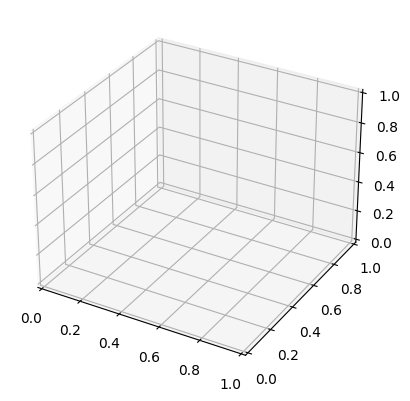

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
print(dir(ax.scatter))

In [ ]:
from sklearn.manifold import TSNE

bluetrain = Xtrain[:,:,:4]
bluetrain = np.mean(bluetrain, axis=1)

RFinp1_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(bluetrain)
df = pd.DataFrame()
df["x"] = RFinp1_embedded[:,0]
df["y"] = RFinp1_embedded[:,1]
df["label"] = Ytrain.tolist()

label_mapping = {
    0: "Normal",
    1: "Sync Attack",
    2: "Reverse PW Attack",
}
df["label_string"] = df["label"].map(label_mapping)


df["x_normal"] = df[df['label_string'] == "Normal"]["x"]
df["x_sync"] = df[df['label_string'] == "Sync Attack"]["x"]
df["x_rpw"] = df[df['label_string'] == "Reverse PW Attack"]["x"]

df["y_normal"] = df[df['label_string'] == "Normal"]["y"]
df["y_sync"] = df[df['label_string'] == "Sync Attack"]["y"]
df["y_rpw"] = df[df['label_string'] == "Reverse PW Attack"]["y"]

In [ ]:
df["x_attack"] = df[df['label_string'] != "Normal"]["x"]
df["y_attack"] = df[df['label_string'] != "Normal"]["y"]

In [ ]:
import seaborn as sns

sns.scatterplot(x="x_attack", y="y_attack", hue="label_string", style="label_string",
                palette=sns.color_palette("hls",8),
                data=df).set(title="Representation visualization with t-SNE.") 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

sns.scatterplot(x="x_normal", y="y_normal", hue="label_string", style="label_string",
                palette=sns.color_palette("hls",8),
                data=df).set(title="Representation visualization with t-SNE.") 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

sns.scatterplot(x="x_sync", y="y_sync", hue="label_string", style="label_string",
                palette=sns.color_palette("hls",8),
                data=df).set(title="Representation visualization with t-SNE.") 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

sns.scatterplot(x="x_rpw", y="y_rpw", hue="label_string", style="label_string",
                palette=sns.color_palette("hls",8),
                data=df).set(title="Representation visualization with t-SNE.") 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [77]:
df_c_FDIA1 = fdia1_c_5
df_m_FDIA1 = fdia1_m_5
df_c_FDIA2 = fdia2_c_6
df_m_FDIA2 = fdia2_m_6
df_c_TDA1 = tda1_c_6
df_m_TDA1 = tda1_m_6
df_c_FDIA3 = fdia3_c_6
df_m_FDIA3 = fdia3_m_6
df_c_FDIA4 = pd.concat([fdia4_c_5, fdia4_c_6])
df_m_FDIA4 = pd.concat([fdia4_m_5, fdia4_m_6])
df_c_TDA2 = tda2_c_5
df_m_TDA2 = tda2_m_5

testdict = prep_somedict(df_c_FDIA1, df_m_FDIA1, df_c_FDIA2, df_m_FDIA2, df_c_FDIA3, df_m_FDIA3, df_c_FDIA4, df_m_FDIA4, df_c_TDA1, df_m_TDA1, df_c_TDA2, df_m_TDA2)

FDIA1
df_c.shape: (10657, 14)
df_m.shape: (866, 32)
Mied1_meas.shape: (433, 32)
Mied2_meas.shape: (433, 32)
2675    171935
Name: frame.number, dtype: int64
16837 171935
559874 -1
97860 171935
0 no hay disco
38 no hay disco
82 no hay disco
126 no hay disco
166 no hay disco
195 no hay disco
219 no hay disco
245 no hay disco
273 no hay disco
303 no hay disco
330 no hay disco
354 no hay disco
397 no hay disco
MODBUS SPEED [0. 1. 2. 3.]
FDIA2
df_c.shape: (8406, 14)
df_m.shape: (690, 32)
Mied1_meas.shape: (346, 32)
Mied2_meas.shape: (344, 32)
Series([], Name: frame.number, dtype: int64)
16 no hay disco
67 no hay disco
115 no hay disco
166 no hay disco
213 no hay disco
267 no hay disco
316 no hay disco
MODBUS SPEED [1. 2. 3.]
FDIA3
df_c.shape: (9223, 15)
df_m.shape: (768, 33)
Mied1_meas.shape: (384, 33)
Mied2_meas.shape: (384, 33)
Series([], Name: frame.number, dtype: int64)
28 no hay disco
76 no hay disco
125 no hay disco
231 no hay disco
281 no hay disco
381 no hay disco
MODBUS SPEED [1. 2.

In [78]:
bin_size = 15
thres = 3

print("FDIA1")
prep_test_data(testdict, 'FDIA1', scaler, 1)
dftest_2 = testdict['FDIA1']['test_data']
Xtest, Ytest = split_test(dftest_2)

start = time.perf_counter()
print("Xtest shape", Xtest.shape)
RFpred = downstream_model.predict(Xtest)
print("RFpred shape", RFpred.shape)
Xpredtes = decoder.predict(RFpred)
print("Xpredtes shape", Xpredtes.shape)
error_test = Xtest-Xpredtes
error_test = error_test.reshape(error_test.shape[0],someval)
testfea = gm.predict(error_test)
print("TESTFEA", testfea)
testfea = testfea.reshape(testfea.shape[0],1)
RFpred = RFpred.reshape(RFpred.shape[0], RFpred.shape[1]*RFpred.shape[2])
RFpred1 = np.concatenate([RFpred, testfea],axis=1)
print("RFPRED1 shape", RFpred1.shape)
Ypred = clf.predict(RFpred1)
print(Ypred)
end = time.perf_counter()
print ((end-start)/Xtest.shape[0])
Y_test = np.array(Ytest)
acc(Y_test, Ypred)
binned_acc(Y_test, Ypred,bin_size,thres)


print("FDIA2")
prep_test_data(testdict, 'FDIA2', scaler, 1)
dftest_2 = testdict['FDIA2']['test_data']
Xtest, Ytest = split_test(dftest_2)

start = time.perf_counter()
RFpred = downstream_model.predict(Xtest)
Xpredtes = decoder.predict(RFpred)
error_test = Xtest-Xpredtes
error_test = error_test.reshape(error_test.shape[0],someval)
testfea = gm.predict(error_test)
testfea = testfea.reshape(testfea.shape[0],1)
RFpred = RFpred.reshape(RFpred.shape[0], RFpred.shape[1]*RFpred.shape[2])
RFpred1 = np.concatenate([RFpred, testfea],axis=1)
Ypred = clf.predict(RFpred1)
end = time.perf_counter()
print ((end-start)/Xtest.shape[0])
Y_test = np.array(Ytest)
acc(Y_test, Ypred)
binned_acc(Y_test, Ypred,bin_size,thres)

print("TDA1")
prep_test_data(testdict, 'TDA1', scaler, 2)
dftest_2 = testdict['TDA1']['test_data']
Xtest, Ytest = split_test(dftest_2)

start = time.perf_counter()
RFpred = downstream_model.predict(Xtest)
Xpredtes = decoder.predict(RFpred)
error_test = Xtest-Xpredtes
error_test = error_test.reshape(error_test.shape[0],someval)
testfea = gm.predict(error_test)
testfea = testfea.reshape(testfea.shape[0],1)
RFpred = RFpred.reshape(RFpred.shape[0], RFpred.shape[1]*RFpred.shape[2])
RFpred1 = np.concatenate([RFpred, testfea],axis=1)
Ypred = clf.predict(RFpred1)
end = time.perf_counter()
print ((end-start)/Xtest.shape[0])
Y_test = np.array(Ytest)
acc(Y_test, Ypred)
binned_acc(Y_test, Ypred,bin_size,thres)

print("FDIA3")
prep_test_data(testdict, 'FDIA3', scaler, 1)
dftest_2 = testdict['FDIA3']['test_data']
Xtest, Ytest = split_test(dftest_2)

start = time.perf_counter()
RFpred = downstream_model.predict(Xtest)
Xpredtes = decoder.predict(RFpred)
error_test = Xtest-Xpredtes
error_test = error_test.reshape(error_test.shape[0],someval)
testfea = gm.predict(error_test)
testfea = testfea.reshape(testfea.shape[0],1)
RFpred = RFpred.reshape(RFpred.shape[0], RFpred.shape[1]*RFpred.shape[2])
RFpred1 = np.concatenate([RFpred, testfea],axis=1)
Ypred = clf.predict(RFpred1)
end = time.perf_counter()
print ((end-start)/Xtest.shape[0])
Y_test = np.array(Ytest)
acc(Y_test, Ypred)
binned_acc(Y_test, Ypred,bin_size,thres)


print("FDIA4")
prep_test_data(testdict, 'FDIA4', scaler, 1)
dftest_2 = testdict['FDIA4']['test_data']
Xtest, Ytest = split_test(dftest_2)

start = time.perf_counter()
RFpred = downstream_model.predict(Xtest)
Xpredtes = decoder.predict(RFpred)
error_test = Xtest-Xpredtes
error_test = error_test.reshape(error_test.shape[0],someval)
testfea = gm.predict(error_test)
testfea = testfea.reshape(testfea.shape[0],1)
RFpred = RFpred.reshape(RFpred.shape[0], RFpred.shape[1]*RFpred.shape[2])
RFpred1 = np.concatenate([RFpred, testfea],axis=1)
Ypred = clf.predict(RFpred1)
end = time.perf_counter()
print ((end-start)/Xtest.shape[0])
Y_test = np.array(Ytest)
acc(Y_test, Ypred)
binned_acc(Y_test, Ypred,bin_size,thres)

print("TDA2")
prep_test_data(testdict, 'TDA2', scaler, 2)
dftest_2 = testdict['TDA2']['test_data']
Xtest, Ytest = split_test(dftest_2)

start = time.perf_counter()
RFpred = downstream_model.predict(Xtest)
Xpredtes = decoder.predict(RFpred)
error_test = Xtest-Xpredtes
error_test = error_test.reshape(error_test.shape[0],someval)
testfea = gm.predict(error_test)
testfea = testfea.reshape(testfea.shape[0],1)
RFpred = RFpred.reshape(RFpred.shape[0], RFpred.shape[1]*RFpred.shape[2])
RFpred1 = np.concatenate([RFpred, testfea],axis=1)
Ypred = clf.predict(RFpred1)
end = time.perf_counter()
print ((end-start)/Xtest.shape[0])
Y_test = np.array(Ytest)
acc(Y_test, Ypred)
binned_acc(Y_test, Ypred,bin_size,thres)

FDIA1
ARR ATTACK NO SLIDING SIZE:  (184, 9)
ARR NORMAL SIZE:  (239, 90)
ARR ATTACK SIZE:  (174, 90)
(239, 91)
(174, 91)
(413, 91)
Xtest shape (413, 10, 9)
13/13 [==============================] - 0s 6ms/step
RFpred shape (413, 2, 140)
13/13 [==============================] - 0s 5ms/step
Xpredtes shape (413, 10, 9)
TESTFEA [20 20 20  0 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  5  0 21  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1
  1 16 23  4 18 26 24  3  7 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20  0 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 

In [ ]:
dir(clf.estimators_[0].tree_)

In [ ]:
[estimator.tree_.children_right for estimator in clf.estimators_]

In [ ]:
clf.get_params()

In [ ]:
downstream_model.layers[2].get_weights()[0].shape

In [ ]:
downstream_model.layers[3].weights

In [ ]:
downstream_model.layers[3].summary()

In [ ]:
downstream_model.summary()

In [ ]:
encoder.summary()

In [ ]:
print("TDA2")
prep_test_data(testdict, 'TDA2', scaler, 2)
dftest_2 = testdict['TDA2']['test_data']
Xtest, Ytest = split_test(dftest_2)

start = time.perf_counter()
RFpred = downstream_model.predict(Xtest)
Xpredtes = decoder.predict(RFpred)
error_test = Xtest-Xpredtes
error_test = error_test.reshape(error_test.shape[0],100)
testfea = gm.predict(error_test)
testfea = testfea.reshape(testfea.shape[0],1)
RFpred = RFpred.reshape(RFpred.shape[0], RFpred.shape[1]*RFpred.shape[2])
RFpred1 = np.concatenate([RFpred, testfea],axis=1)
Ypred = clf.predict(RFpred1)
end = time.perf_counter()
print ((end-start)/Xtest.shape[0])
Y_test = np.array(Ytest)
acc(Y_test, Ypred)

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(clf)

In [ ]:
RFpred1.shape

In [ ]:
classdict = {}
classdict[0] = []
classdict[1] = []
classdict[2] = []
for index, instance in enumerate(RFpred1):
    if index%30 == 0:
        print(index)
    predict = np.argmax(clf.predict_proba(RFpred1[index].reshape(1,-1)))
    shap_values = explainer.shap_values(instance)
    feat_max = np.argmax(shap_values[predict])
    classdict[predict].append(feat_max)

In [ ]:
np.unique(classdict[2], return_counts=True)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], chosen_instance)

In [ ]:
shap_values[1]

In [ ]:
chosen_instance

In [ ]:
np.argwhere(clf.predict(RFpred1) == 2)

In [ ]:
np.argwhere(Y_test == 2)

In [ ]:
RFpred1.shape

In [ ]:
clf.predict_proba(RFpred1[233].reshape(1,-1))

In [ ]:
RFpred1[233]

In [ ]:
RFpred1[89]

In [ ]:
Y_test.shape

In [ ]:
testdict['FDIA3']['mied2_meas'].shape